In [13]:
import pandas as pd

df_trx = pd.read_parquet(
    "../data/test_datasets/mbd_dataset/detail/trx/fold=0"
)

df_trx.head()


,client_id,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
0,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-26 13:58:59.938408,1.021543e+06,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
1,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-09 07:43:20.639579,3.007656e+05,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
2,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-22 09:12:06.614108,6.061549e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
3,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-12 15:12:20.660481,8.032591e+04,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
4,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-08 06:52:28.877461,1.222866e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0


In [14]:
df_trx.describe()

,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
count,7634228,7.634228e+06,7.634228e+06,7.634228e+06,7.634192e+06,7.588765e+06,7.588765e+06,7.580026e+06,7.580026e+06,7.626199e+06,7.626199e+06,7.618069e+06,7.618069e+06
mean,2022-01-06 06:06:45.856158720,7.037684e+05,2.249315e+01,2.753563e+01,1.099737e+01,3.467387e+01,2.243373e+02,7.358390e+02,2.077095e+04,2.454554e+04,3.627590e+01,1.190242e+03,4.038951e+01
min,2020-12-31 21:00:11.062887,1.168688e-05,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,5.000000e+00,2.120000e+02,1.600000e+01,1.000000e+00,3.000000e+00,1.000000e+00
25%,2021-07-06 18:29:05.728897536,2.297636e+03,1.000000e+00,1.200000e+01,1.100000e+01,2.200000e+01,4.700000e+01,3.060000e+02,1.606700e+04,1.299300e+04,9.000000e+00,4.940000e+02,1.900000e+01
50%,2022-01-02 08:07:45.843692800,1.666204e+04,1.300000e+01,2.300000e+01,1.100000e+01,2.200000e+01,4.700000e+01,7.800000e+02,2.161900e+04,2.502600e+04,2.900000e+01,1.119000e+03,3.600000e+01
75%,2022-07-10 16:12:07.381889536,8.850691e+04,4.600000e+01,4.000000e+01,1.100000e+01,2.200000e+01,4.650000e+02,7.930000e+02,2.676600e+04,3.716800e+04,5.600000e+01,1.846000e+03,6.000000e+01
max,2022-12-31 20:59:56.338108,8.811039e+10,5.600000e+01,6.200000e+01,1.700000e+01,1.850000e+02,1.140000e+03,1.604000e+03,3.305500e+04,4.892300e+04,8.800000e+01,2.506000e+03,8.900000e+01
std,NaN,6.397719e+07,2.126929e+01,1.645170e+01,2.060438e-01,3.372444e+01,3.017901e+02,4.893076e+02,7.106693e+03,1.397403e+04,2.714266e+01,7.541996e+02,2.304687e+01


In [15]:
customer_profile = (
    df_trx
    .groupby("client_id")
    .agg(
        total_transactions=("amount", "count"),
        total_amount=("amount", "sum"),
        avg_transaction=("amount", "mean"),
        first_date=("event_time", "min"),
        last_date=("event_time", "max"),
        unique_event_types=("event_type", "nunique"),
    )
    .reset_index()
)


In [16]:
customer_profile.describe()

,total_transactions,total_amount,avg_transaction,first_date,last_date,unique_event_types
count,20032.000000,2.003200e+04,2.003200e+04,20032,20032,20032.000000
mean,381.101637,2.682073e+08,5.626491e+05,2021-04-10 03:32:01.219213824,2022-11-26 13:49:07.548082176,6.836212
min,1.000000,4.474146e-02,4.474146e-02,2020-12-31 21:00:11.062887,2021-01-08 09:41:41.781541,1.000000
25%,41.000000,2.968533e+06,4.443369e+04,2021-01-01 19:02:12.675140608,2022-12-12 07:05:14.652509696,3.000000
50%,169.000000,1.880602e+07,1.104954e+05,2021-01-05 10:55:18.238245632,2022-12-28 12:30:25.590043392,5.000000
75%,512.000000,8.123614e+07,2.651652e+05,2021-03-10 05:42:16.997827328,2022-12-31 05:42:43.943133696,10.000000
max,169039.000000,5.286727e+11,9.926093e+08,2022-12-31 16:37:24.347548,2022-12-31 20:59:56.338108,31.000000
std,1357.369024,6.142678e+09,1.028291e+07,NaN,NaN,5.352595


Профиль клиента выглядит достаточно хорошо, для нашей задачи, датасет подходит

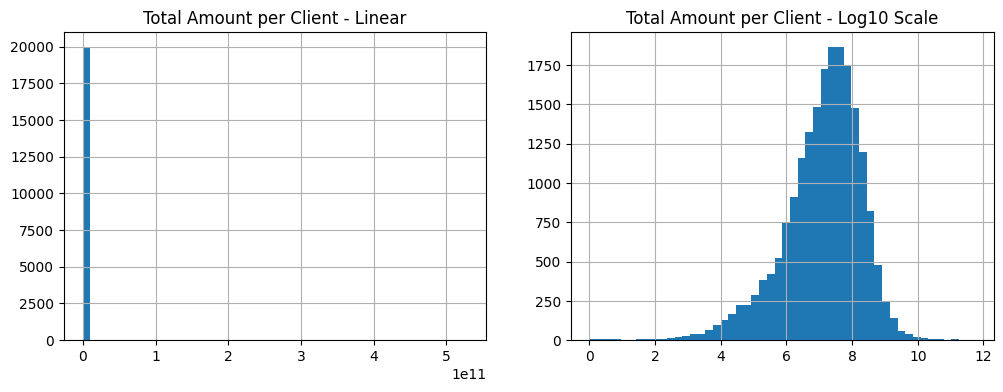

Клиентов с общей суммой > 1 млрд: 442
     total_transactions  total_amount  avg_transaction
102                 858  4.819175e+09     5.616754e+06
138                  80  7.984993e+09     9.981241e+07
154                 860  1.377572e+09     1.601828e+06
194                1272  1.042162e+09     8.193101e+05
235                 526  1.162012e+09     2.209149e+06

Медианный клиент: 169 транзакций, 18,674,242 общей суммы

Среднее дней активности: 595.0
Медиана дней активности: 715.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Проверка распределения сумм (логарифмическая шкала)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
customer_profile['total_amount'].hist(bins=50)
plt.title('Total Amount per Client - Linear')
plt.subplot(1, 2, 2)
customer_profile['total_amount'].apply(lambda x: np.log10(x+1)).hist(bins=50)
plt.title('Total Amount per Client - Log10 Scale')
plt.show()

super_clients = customer_profile[customer_profile['total_amount'] > 1e9]  # > 1 млрд
print(f"Клиентов с общей суммой > 1 млрд: {len(super_clients)}")
print(super_clients[['total_transactions', 'total_amount', 'avg_transaction']].head())

# Проверим медианного клиента (50-й перцентиль)
median_client = customer_profile[customer_profile['total_transactions'] == 169].iloc[0]
print(f"\nМедианный клиент: {median_client['total_transactions']} транзакций, {median_client['total_amount']:,.0f} общей суммы")

# Распределение по времени активности
customer_profile['activity_days'] = (customer_profile['last_date'] - customer_profile['first_date']).dt.days
print(f"\nСреднее дней активности: {customer_profile['activity_days'].mean():.1f}")
print(f"Медиана дней активности: {customer_profile['activity_days'].median():.1f}")